In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# STEP 1: Import libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# STEP 2: Set parameters
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 5  # You can increase this if training speed is acceptable

# STEP 3: Define categories and dataset path
CLASSES = ['Shoe', 'Sandal', 'Boot']  # Replace with your actual folder names
train_dir = '/kaggle/input/footware/Footwear'  # Change this to your dataset path

# STEP 4: Data Preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    classes=CLASSES
)

val_gen = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    classes=CLASSES
)

# STEP 5: Simplified AlexNet-like CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(CLASSES), activation='softmax')
])

# STEP 6: Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# STEP 7: Train the model
history = model.fit(train_gen, validation_data=val_gen, epochs=EPOCHS)

# STEP 8: Evaluate the model
loss, accuracy = model.evaluate(val_gen)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


2025-08-27 16:31:37.964792: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756312298.346079      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756312298.438871      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1756312317.062943      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1756312317.063637      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can i

Epoch 1/5


I0000 00:00:1756312321.213065     112 service.cc:148] XLA service 0x7e4308004c10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756312321.214701     112 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1756312321.214725     112 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1756312321.592713     112 cuda_dnn.cc:529] Loaded cuDNN version 90300


 3/75 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.3038 - loss: 1.1628

I0000 00:00:1756312325.384830     112 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 148ms/step - accuracy: 0.5944 - loss: 0.8094 - val_accuracy: 0.8967 - val_loss: 0.2735
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.8982 - loss: 0.2639 - val_accuracy: 0.9083 - val_loss: 0.2137
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9307 - loss: 0.1804 - val_accuracy: 0.9300 - val_loss: 0.1964
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.9479 - loss: 0.1402 - val_accuracy: 0.9383 - val_loss: 0.1620
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.9592 - loss: 0.1085 - val_accuracy: 0.9667 - val_loss: 0.1437
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9725 - loss: 0.1365
Validation Accuracy: 96.67%


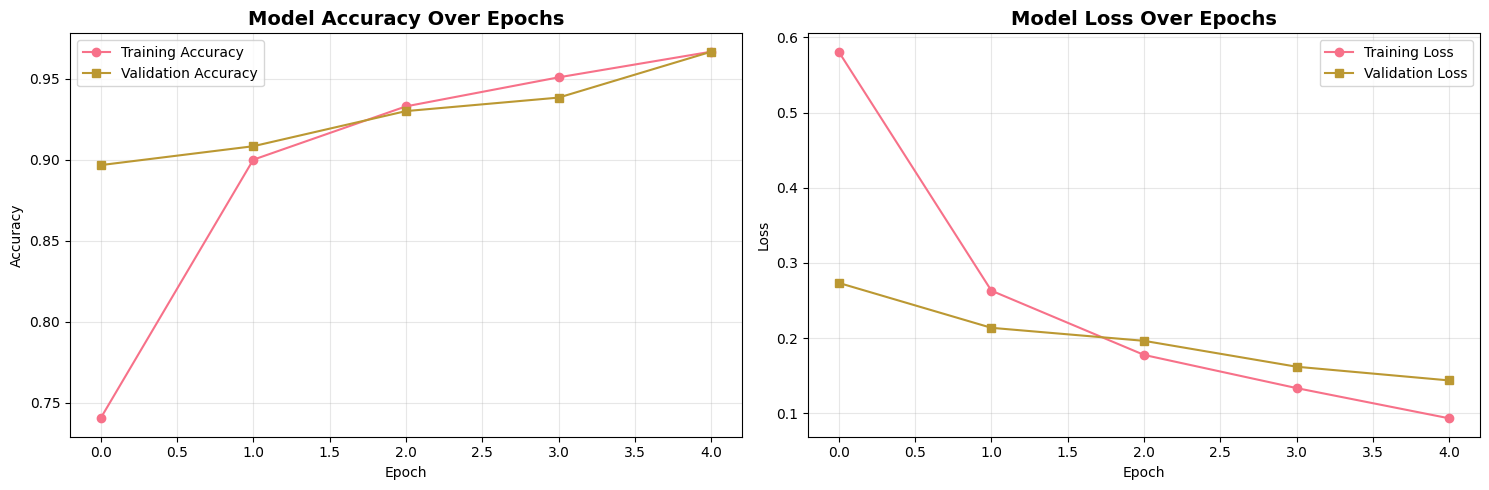

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


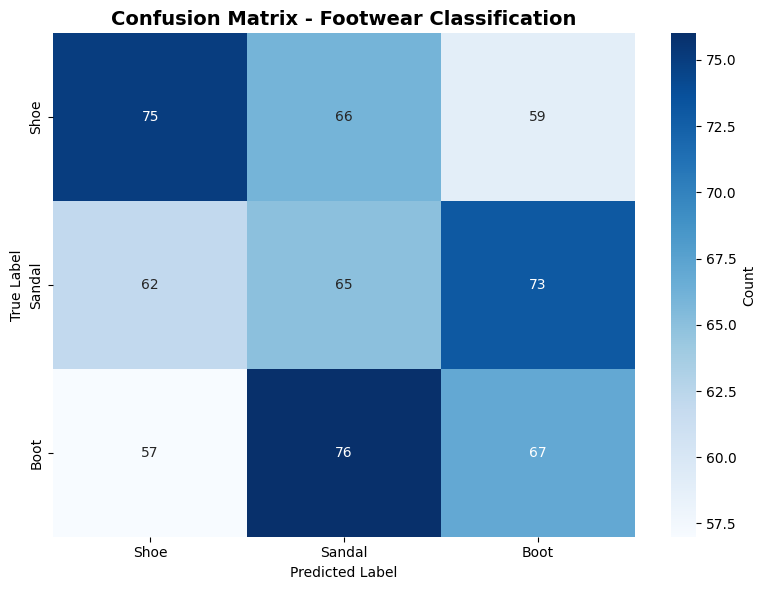


Classification Report:
              precision    recall  f1-score   support

        Shoe       0.39      0.38      0.38       200
      Sandal       0.31      0.33      0.32       200
        Boot       0.34      0.34      0.34       200

    accuracy                           0.34       600
   macro avg       0.35      0.34      0.35       600
weighted avg       0.35      0.34      0.35       600

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


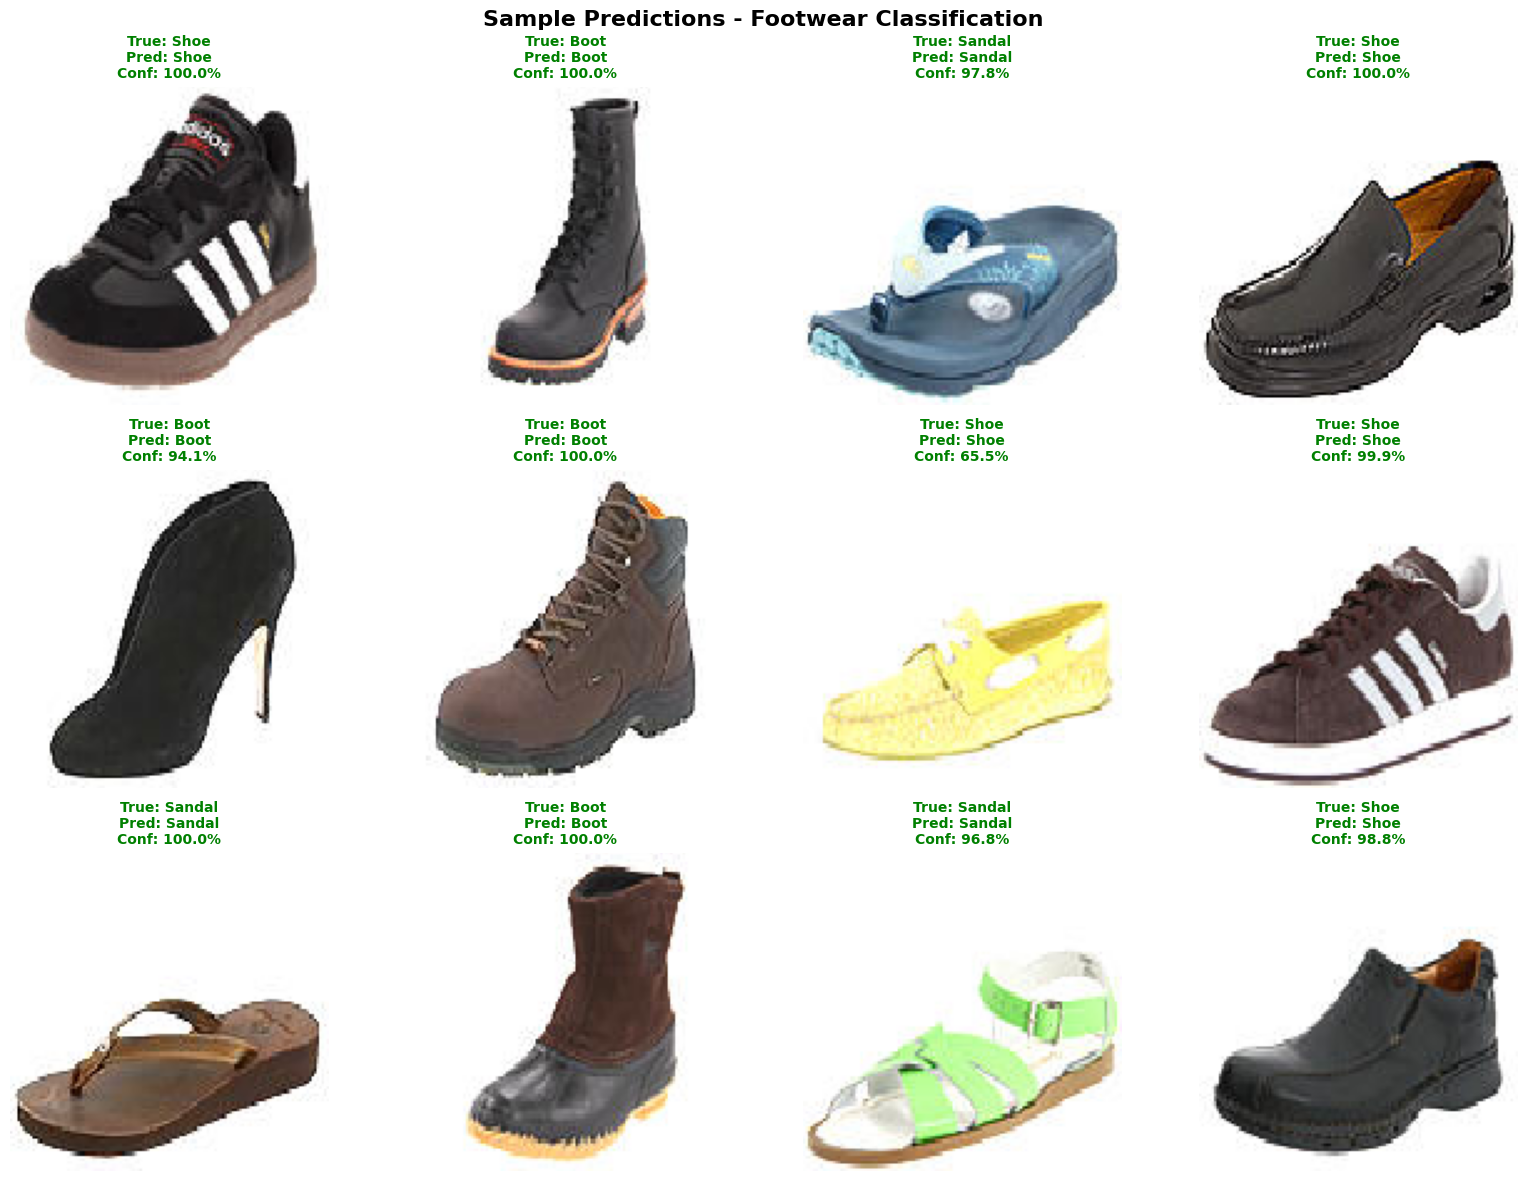


Model Architecture Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,915,083 (37.82 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,610,056 (25.22 MB)


Model architecture diagram saved as 'model_architecture.png'


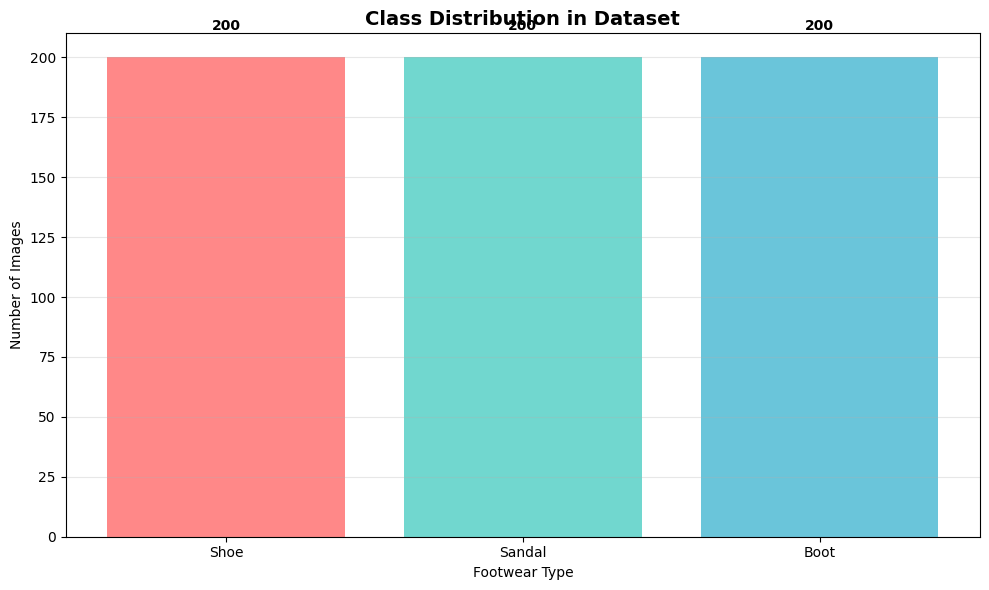


Dataset Statistics:
Total images: 600
Shoe: 200 images (33.3%)
Sandal: 200 images (33.3%)
Boot: 200 images (33.3%)

Learning Curves Analysis:
Final Training Accuracy: 0.9667
Final Validation Accuracy: 0.9667
Final Training Loss: 0.0933
Final Validation Loss: 0.1437

Model Analysis:
✅ Good generalization (small accuracy gap)
✅ Reasonable loss difference

Suggestions:

VISUALIZATION COMPLETE!


In [2]:
# STEP 9: Visualization and Analysis

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from tensorflow.keras.preprocessing import image

# Set style for better looking plots
plt.style.use('default')
sns.set_palette("husl")

# 9.1: Plot Training History
def plot_training_history(history):
    """Plot training and validation accuracy and loss"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
    ax1.set_title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot loss
    ax2.plot(history.history['loss'], label='Training Loss', marker='o')
    ax2.plot(history.history['val_loss'], label='Validation Loss', marker='s')
    ax2.set_title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Call the function
plot_training_history(history)

# 9.2: Generate Predictions for Confusion Matrix
def generate_predictions(model, generator):
    """Generate predictions and true labels for confusion matrix"""
    generator.reset()  # Reset generator
    predictions = model.predict(generator, steps=len(generator))
    predicted_classes = np.argmax(predictions, axis=1)
    
    true_classes = generator.classes
    class_labels = list(generator.class_indices.keys())
    
    return true_classes, predicted_classes, class_labels

# Generate predictions
y_true, y_pred, class_names = generate_predictions(model, val_gen)

# 9.3: Plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    """Plot confusion matrix with heatmap"""
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Count'})
    plt.title('Confusion Matrix - Footwear Classification', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()
    
    # Calculate and print classification metrics
    print("\nClassification Report:")
    print("=" * 50)
    print(classification_report(y_true, y_pred, target_names=class_names))

plot_confusion_matrix(y_true, y_pred, class_names)

# 9.4: Visualize Sample Predictions
def visualize_predictions(model, generator, num_samples=12):
    """Visualize sample predictions with confidence scores"""
    generator.reset()
    
    # Get a batch of images and labels
    images, true_labels = next(generator)
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    confidence_scores = np.max(predictions, axis=1)
    
    # Create subplot
    fig, axes = plt.subplots(3, 4, figsize=(16, 12))
    axes = axes.ravel()
    
    for i in range(min(num_samples, len(images))):
        # Display image
        axes[i].imshow(images[i])
        axes[i].axis('off')
        
        # Get true and predicted labels
        true_class = class_names[np.argmax(true_labels[i])]
        pred_class = class_names[predicted_classes[i]]
        confidence = confidence_scores[i] * 100
        
        # Set title with prediction info
        color = 'green' if true_class == pred_class else 'red'
        title = f'True: {true_class}\nPred: {pred_class}\nConf: {confidence:.1f}%'
        axes[i].set_title(title, fontsize=10, color=color, fontweight='bold')
    
    plt.suptitle('Sample Predictions - Footwear Classification', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

visualize_predictions(model, val_gen)

# 9.5: Model Architecture Visualization
def plot_model_summary(model):
    """Display model architecture summary"""
    print("\nModel Architecture Summary:")
    print("=" * 60)
    model.summary()
    
    # Plot model architecture (if graphviz is available)
    try:
        tf.keras.utils.plot_model(model, to_file='model_architecture.png', 
                                  show_shapes=True, show_layer_names=True, 
                                  rankdir='TB', dpi=150)
        print("\nModel architecture diagram saved as 'model_architecture.png'")
    except:
        print("\nNote: Install graphviz and pydot to generate model architecture diagram")

plot_model_summary(model)

# 9.6: Class Distribution Visualization
def plot_class_distribution(generator):
    """Plot the distribution of classes in the dataset"""
    class_counts = {}
    for class_name in generator.class_indices:
        class_counts[class_name] = np.sum(generator.classes == generator.class_indices[class_name])
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(class_counts.keys(), class_counts.values(), 
                   color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8)
    plt.title('Class Distribution in Dataset', fontsize=14, fontweight='bold')
    plt.xlabel('Footwear Type')
    plt.ylabel('Number of Images')
    plt.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 10,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\nDataset Statistics:")
    print(f"Total images: {sum(class_counts.values())}")
    for class_name, count in class_counts.items():
        percentage = (count / sum(class_counts.values())) * 100
        print(f"{class_name}: {count} images ({percentage:.1f}%)")

plot_class_distribution(val_gen)

# 9.7: Learning Curves Analysis
def analyze_learning_curves(history):
    """Analyze and provide insights about learning curves"""
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]
    
    print("\nLearning Curves Analysis:")
    print("=" * 40)
    print(f"Final Training Accuracy: {final_train_acc:.4f}")
    print(f"Final Validation Accuracy: {final_val_acc:.4f}")
    print(f"Final Training Loss: {final_train_loss:.4f}")
    print(f"Final Validation Loss: {final_val_loss:.4f}")
    
    # Check for overfitting
    acc_gap = final_train_acc - final_val_acc
    loss_gap = final_val_loss - final_train_loss
    
    print(f"\nModel Analysis:")
    if acc_gap > 0.1:
        print("⚠️  Potential overfitting detected (large accuracy gap)")
    elif acc_gap < 0.05:
        print("✅ Good generalization (small accuracy gap)")
    else:
        print("⚡ Moderate generalization")
    
    if loss_gap > 0.5:
        print("⚠️  Validation loss significantly higher than training loss")
    else:
        print("✅ Reasonable loss difference")
    
    # Suggestions
    print(f"\nSuggestions:")
    if final_val_acc < 0.8:
        print("- Consider training for more epochs")
        print("- Try data augmentation techniques")
        print("- Experiment with different learning rates")
    if acc_gap > 0.1:
        print("- Add more dropout or regularization")
        print("- Collect more training data")
        print("- Reduce model complexity")

analyze_learning_curves(history)

print("\n" + "="*60)
print("VISUALIZATION COMPLETE!")
print("="*60)